In [10]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**


По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [11]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

In [12]:
a = torch.FloatTensor([1., 2])
print(a)
print(a.shape)
b = torch.FloatTensor([[1., 2, 3], [4, 5, 6]])
print(b)
print(b.shape)

tensor([1., 2.])
torch.Size([2])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


 We can set the dimension of tensor in pytorch, but the content of tensor will have a rubbish

solve: set dimensoin and reset data(zeroed)


In [13]:
x = torch.FloatTensor(2, 3, 4)
print(x)
print(x.shape)
x.zero_()
print(x)
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
print("zero \n", x)
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
print("random \n", x)
x.uniform_(0, 1)                      # Равномерно U[0, 1]
print("uniform \n", x)
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
print("normal \n", x)
x.bernoulli_(p=0.5)                   # bernoulli with parameter p
print("bernulli \n", x)

tensor([[[ 5.1539e-37,  0.0000e+00,  9.5989e-43,  2.4625e-40],
         [ 2.5779e-37, -8.8039e-10,  2.5353e+30,  9.6549e-43],
         [ 2.4769e-40,  2.6367e-37, -2.2538e-07,  2.5353e+30]],

        [[ 9.7110e-43,  2.4912e-40,  2.6955e-37, -5.7697e-05],
         [ 2.3612e+21,  1.4013e-45,  0.0000e+00,  0.0000e+00],
         [ 4.2039e-45,  5.6052e-45,  2.3510e-38,  9.4882e-42]]])
torch.Size([2, 3, 4])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
zero 
 tensor([[2.6516, 0.1856, 0.6168],
        [0.6191, 0.3054, 1.4932]])
random 
 tensor([[5., 5., 8.],
        [8., 0., 3.]])
uniform 
 tensor([[0.8406, 0.7767, 0.4843],
        [0.4228, 0.0944, 0.0516]])
normal 
 tensor([[-0.2911, -1.0646, -0.6136],
        [ 1.1146, -0.0168,  0.0236]])
bernulli 
 tensor([[0., 0., 0.],
        [0., 1., 1.]])


### Изменение формы
`np.reshape()` == `torch.view()`:

In [14]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x1 = x.view(3, 2)
x2 = x.view(6)
print(x, "\n", x1, "\n", x2)


tensor([[-0.5867, -0.8209,  0.1160],
        [-1.7725, -0.5375, -0.6714]]) 
 tensor([[-0.5867, -0.8209],
        [ 0.1160, -1.7725],
        [-0.5375, -0.6714]]) 
 tensor([-0.5867, -0.8209,  0.1160, -1.7725, -0.5375, -0.6714])


### Изменение типа тензора

In [15]:
a = torch.FloatTensor([1.5, 3.2, -7])
a1 = a.type_as(torch.IntTensor())
a2 = a.to(torch.int32)
a3 = a.type_as(torch.ByteTensor())
print(a, "\n", a1, "\n",a2, "\n", a3, "\n")

tensor([ 1.5000,  3.2000, -7.0000]) 
 tensor([ 1,  3, -7], dtype=torch.int32) 
 tensor([ 1,  3, -7], dtype=torch.int32) 
 tensor([  1,   3, 249], dtype=torch.uint8) 



### idexes:

In [16]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
print(a)
print(a[0, 0])
print(a[0:2, 0:2])

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])
tensor(100.)
tensor([[100.,  20.],
        [ 15., 163.]])


### operator

In [17]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])
print(a, "\n \n ", b, "\n")
print(a+b, "\n")
print(a[a>b], "\n")

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]]) 
 
  tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]]) 

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]]) 

tensor([ 1.,  2.,  3., 10., 20., 30.]) 



In [18]:
b -= a
print(b)
a.sub(b) # copy

tensor([[ -2.,  -4.,  -6.],
        [-20., -40., -60.],
        [  0.,   0.,   0.]])


tensor([[  3.,   6.,   9.],
        [ 30.,  60.,  90.],
        [100., 200., 300.]])

In [19]:
a.sub_(b) # inplace

tensor([[  3.,   6.,   9.],
        [ 30.,  60.,  90.],
        [100., 200., 300.]])

In [20]:
a * b

tensor([[   -6.,   -24.,   -54.],
        [ -600., -2400., -5400.],
        [    0.,     0.,     0.]])

In [21]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
print(a)

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])


In [22]:
print(torch.sin(a))
print(a.sin(),"\n \n", a.log(), "\n \n", a.exp())

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])
tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]]) 
 
 tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]]) 
 
 tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.


In [23]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a1 = a[:, None, :]

In [24]:
a1.shape

torch.Size([3, 1, 3])

In [25]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

In [26]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result # <YOUR CODE>

A = torch.FloatTensor([[1, 4], 
                       [2, 7]] )
vertical_means(A)

tensor([1.5000, 5.5000])

In [27]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
print(a)
print(a.t())

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])
tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])


In [28]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])
print(a * b)
print(a.dot(b))
print(a @ b)

tensor([ -1.,  -4., -12., -24., -40., -60.])
tensor(-141.)
tensor(-141.)


In [29]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])
print(a @ b)
print(a.mm(b))

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])
tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])


In [30]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [31]:
import numpy as np

a = np.random.rand(3, 3)
print(a)
b = torch.from_numpy(a)
print(b)

[[0.8482628  0.72761037 0.02177304]
 [0.42729726 0.94905746 0.91663637]
 [0.96482837 0.10148448 0.19771628]]
tensor([[0.8483, 0.7276, 0.0218],
        [0.4273, 0.9491, 0.9166],
        [0.9648, 0.1015, 0.1977]], dtype=torch.float64)


**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [32]:
b -= b
print("b", b)
print("a", a)

b tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
a [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [33]:
a = torch.FloatTensor(2, 3, 4)
b = a.numpy()
print(a,"\n",b)

tensor([[[5.1550e-37, 0.0000e+00, 1.2031e-38, 1.1388e-38],
         [1.6751e-37, 1.2812e-20, 1.7486e-37, 1.8589e-37],
         [1.1389e-38, 4.8128e-38, 9.2695e+08, 1.0721e-35]],

        [[1.1389e-38, 7.4062e-37, 2.4781e+05, 4.4011e-35],
         [2.2971e-39, 1.1389e-38, 2.9626e-36, 2.9741e-36],
         [2.9626e-36, 6.7004e-37, 2.2968e-39, 1.1391e-38]]]) 
 [[[5.1550134e-37 0.0000000e+00 1.2030971e-38 1.1388135e-38]
  [1.6751487e-37 1.2811873e-20 1.7486452e-37 1.8588764e-37]
  [1.1388840e-38 4.8128134e-38 9.2694554e+08 1.0721149e-35]]

 [[1.1389212e-38 7.4062359e-37 2.4780839e+05 4.4010864e-35]
  [2.2971374e-39 1.1389212e-38 2.9625959e-36 2.9740755e-36]
  [2.9626339e-36 6.7003626e-37 2.2967912e-39 1.1391054e-38]]]


### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [34]:
def forward_pass(X, w):
  logits = X @ w
  sigma = torch.sigmoid(logits)

  return sigma

X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]]) # three objects with two featureses
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]]) #weigth 
print(w.shape)
result = forward_pass(X, w)
print(result)

torch.Size([3, 2])
torch.Size([2, 1])
tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [35]:
x = torch.FloatTensor(1024, 10024).uniform_()
print(x)
print(x.is_cuda)


tensor([[0.1022, 0.6227, 0.8070,  ..., 0.0757, 0.5048, 0.8239],
        [0.1530, 0.7764, 0.1938,  ..., 0.4950, 0.3916, 0.3178],
        [0.6368, 0.2683, 0.0160,  ..., 0.7117, 0.4152, 0.3671],
        ...,
        [0.1936, 0.9628, 0.2563,  ..., 0.5889, 0.1719, 0.6680],
        [0.3594, 0.9233, 0.9806,  ..., 0.1171, 0.4356, 0.5600],
        [0.2030, 0.5258, 0.2070,  ..., 0.4766, 0.7950, 0.8439]])
False


In [36]:
!nvidia-smi

Tue Jan 10 07:56:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Set device for calculated

In [37]:
x = x.cuda()

In [38]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
print(x.cuda())
x.cpu()
torch.cuda.empty_cache() # for cleaning memory in GPU

tensor([[0.1022, 0.6227, 0.8070,  ..., 0.0757, 0.5048, 0.8239],
        [0.1530, 0.7764, 0.1938,  ..., 0.4950, 0.3916, 0.3178],
        [0.6368, 0.2683, 0.0160,  ..., 0.7117, 0.4152, 0.3671],
        ...,
        [0.1936, 0.9628, 0.2563,  ..., 0.5889, 0.1719, 0.6680],
        [0.3594, 0.9233, 0.9806,  ..., 0.1171, 0.4356, 0.5600],
        [0.2030, 0.5258, 0.2070,  ..., 0.4766, 0.7950, 0.8439]],
       device='cuda:0')


In [39]:
torch.cuda.empty_cache() # for cleaning memory in GPU
!nvidia-smi

Tue Jan 10 07:56:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    27W /  70W |    610MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()



In [41]:
# we can't do anythong with data from cpu and gpu
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()
a+b # error

RuntimeError: ignored

In [42]:
x = torch.FloatTensor(3, 3, 3).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(x, y)
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[0.5968, 0.1959, 0.9990],
         [0.1324, 0.2708, 0.0298],
         [0.5108, 0.2392, 0.9521]],

        [[0.1764, 0.9215, 0.1941],
         [0.8633, 0.4875, 0.7696],
         [0.0514, 0.4414, 0.1607]],

        [[0.0325, 0.3310, 0.3943],
         [0.0222, 0.6975, 0.9373],
         [0.0187, 0.1283, 0.6108]]], device='cuda:0') tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], device='cuda:0')
tensor([[[1.5968, 1.1959, 1.9990],
         [1.1324, 1.2708, 1.0298],
         [1.5108, 1.2392, 1.9521]],

        [[1.1764, 1.9215, 1.1941],
         [1.8633, 1.4875, 1.7696],
         [1.0514, 1.4414, 1.1607]],

        [[1.0325, 1.3310, 1.3943],
         [1.0222, 1.6975, 1.9373],
         [1.0187, 1.1283, 1.6108]]], device='cuda:0')
tensor([[[1.5968, 1.1959, 1.9990],
         [1.1324, 1.2708, 1.0298],
         [1.5108, 1.2392

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

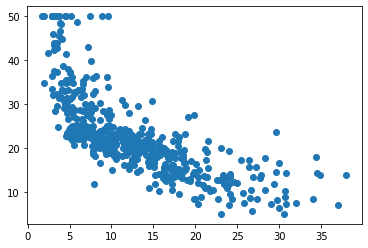

In [43]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [55]:
# make the weigth array and free coefficcient
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# set x and y value
x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

y_pred = w * x +b
loss = torch.mean((y - y_pred) ** 2)
loss.backward()

In [48]:
print(w.grad)
print(b.grad)

tensor([-44.8208])
tensor([-43.0656])


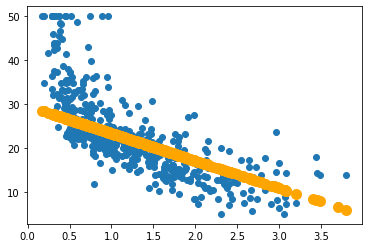

loss =  44.59417


In [56]:
from IPython.display import clear_output

for i in range(100):
  y_pred = w * x +b
  loss = torch.mean((y - y_pred) ** 2)
  loss.backward()

  # gradient steps
  w.data -= 0.05 * w.grad
  b.data -= 0.05 * b.grad

  # reset our gradient data 
  w.grad.data.zero_()
  b.grad.data.zero_()

  # the rest of code is just bells and whistles
  if (i+1) % 5 == 0:
      clear_output(True)
      plt.scatter(x.data.numpy(), y.data.numpy())
      plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                  color='orange', linewidth=5)
      plt.show()

      print("loss = ", loss.data.numpy())
      if loss.data.numpy() < 0.5:
          print("Done!")
          break

### Посмотрим градиенты на примере двухслойной сети

In [59]:
dtype = torch.float
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10


# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты 
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [60]:
# .clamp(min=0) - обнуление всех значений меньше нуля
# (x @ w1) - действие скрытых слоев
# matmul(w2) матричное умножение и дейсвтие последнеейго слоя
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [61]:
print((y_pred - y).pow(2).sum())
w1.grad, w2.grad

tensor(4382.8936, device='cuda:0', grad_fn=<SumBackward0>)


(tensor([[  574.7916, -1877.6581,   543.9227],
         [ -757.0635,  -584.1089,   833.0437],
         [-1373.3140,  -331.9698,    97.8417]], device='cuda:0'),
 tensor([[  72.2610,  -21.6120,    1.6940,  -79.6549,  449.0815,  163.5186,
          -143.4415, -209.1132, -236.3418,  483.2629],
         [ 424.6388,  385.8642,  143.4476, -229.2647,  442.1392,  113.4232,
            -8.6492, -824.9554, -179.9689,    8.0540],
         [ -54.6274,   24.7555,   -3.0628,   30.6219,  161.6009,   50.8987,
           -90.7710,   77.2373,  -37.7438,   34.9310]], device='cuda:0'))

In [62]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

<ipython-input-62-391fe38783cc>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  loss.grad # нет доступа к нелистовым градиентам в дереве AD


In [63]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
# ЗАСТАвляем считать градиенты для лосс
loss.retain_grad()

loss.backward()
loss.grad

tensor(1., device='cuda:0')